# Handwritten Digit Recognition

This notebook demonstrates handwritten digit recognition using the MNIST dataset and TensorFlow/Keras.

## Install Dependencies

```python
!pip install tensorflow matplotlib
```


In [1]:
!pip install tensorflow matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [3]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2892 - accuracy: 0.9179 - val_loss: 0.1588 - val_accuracy: 0.9546
Epoch 2/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1296 - accuracy: 0.9622 - val_loss: 0.1164 - val_accuracy: 0.9669
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0878 - accuracy: 0.9736 - val_loss: 0.1003 - val_accuracy: 0.9702
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0950 - val_accuracy: 0.9723
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0926 - val_accuracy: 0.9723


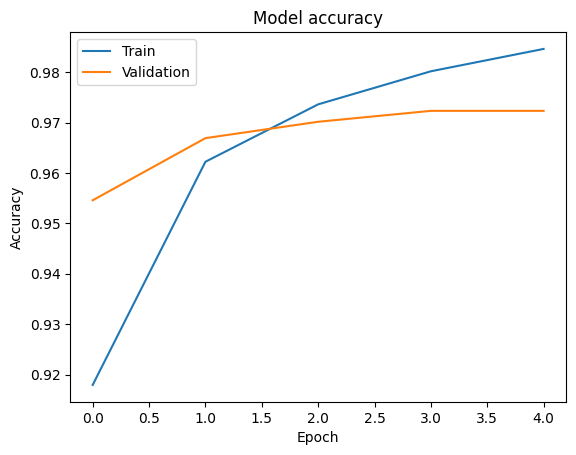

In [5]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - loss: 0.0834 - accuracy: 0.9745 - 614ms/epoch - 2ms/step

Test accuracy: 0.9745000004768372


313/313 [==============================] - 1s 2ms/step


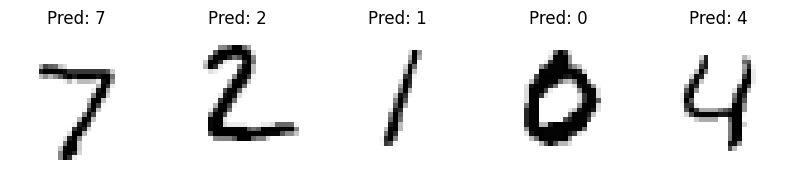

In [7]:
predictions = model.predict(x_test)

# Plot some predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f'Pred: {np.argmax(predictions[i])}')
    plt.axis('off')
plt.show()
